In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Task 1: Read CSV Files
df=pd.read_csv('ipl/matches.csv')
df2=pd.read_csv('ipl/deliveries.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
##Task 2: Get top-level summary
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
##Task 3: Check if column 'umpire3' is useful. If not drop it and save the dataframe to a file.
### if there have any number in umpire3 or it all filled up with Nan
# daf = pd.DataFrame({'A':[1,2,3,3],'B':[1,1,1,6]}) 
# daf.nunique() ## number of unique value in each column
# daf['A'].unique() ## all unique elements of a given column
df['umpire3'].unique()

df_new = df.drop(['umpire3'],axis=1)
df_new.to_csv('ipl/matches2.csv',index=False)
df_new.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [5]:
##Task 4: Print Total Number of Mataches played, Number of Seasons,
print("Total number of Matches:",df.shape[0])
print("Number of Seasons:",df['season'].nunique()) ## df.nunique().season

Total number of Matches: 636
Number of Seasons: 10


In [6]:
#Task 5: Players who have won the most "Player of the Match" 
## And Team which has the highest number of match wins
print("The most won player:",df['player_of_match'].value_counts().idxmax())
print("The team that wins match most:",df['winner'].value_counts().idxmax())

The most won player: CH Gayle
The team that wins match most: Mumbai Indians


In [7]:
#Task 6: Find Teams which have won matches by a huge margin
huge_margin=df[(df['win_by_runs']>=100) | (df['win_by_wickets']>=8)]
huge_margin['winner'].value_counts()

Royal Challengers Bangalore    17
Kolkata Knight Riders          16
Delhi Daredevils               13
Mumbai Indians                 12
Rajasthan Royals               12
Chennai Super Kings             9
Kings XI Punjab                 7
Sunrisers Hyderabad             5
Kochi Tuskers Kerala            2
Deccan Chargers                 2
Rising Pune Supergiant          1
Rising Pune Supergiants         1
Name: winner, dtype: int64

In [8]:
#Task 7: Find Count of Matches Played at each city 
df['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Ranchi             7
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Cuttack            7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [9]:
#Task 8: Find Min and Max win_by_wickets at each city
w=df['win_by_wickets'].groupby(df['city'])
w_max=w.agg(np.max)
w_min=w.agg(np.min)
print("Min win_by_wickets at each city:\n",w_min)
print("Max win_by_wickets at each city:\n",w_max)
df.groupby(['city','winner']).size()
df.groupby(['city']).get_group('Abu Dhabi')
df.groupby(['city']).agg([ 'min', 'max'])['win_by_wickets']


Min win_by_wickets at each city:
 city
Abu Dhabi         0
Ahmedabad         0
Bangalore         0
Bloemfontein      0
Cape Town         0
Centurion         0
Chandigarh        0
Chennai           0
Cuttack           0
Delhi             0
Dharamsala        0
Durban            0
East London       0
Hyderabad         0
Indore            6
Jaipur            0
Johannesburg      0
Kanpur            2
Kimberley         0
Kochi             0
Kolkata           0
Mumbai            0
Nagpur            0
Port Elizabeth    0
Pune              0
Raipur            0
Rajkot            0
Ranchi            0
Sharjah           0
Visakhapatnam     0
Name: win_by_wickets, dtype: int64
Max win_by_wickets at each city:
 city
Abu Dhabi          6
Ahmedabad          9
Bangalore         10
Bloemfontein       6
Cape Town         10
Centurion          8
Chandigarh        10
Chennai            9
Cuttack            9
Delhi             10
Dharamsala         6
Durban             9
East London        7
Hyderabad     

,min,max
city,,
Abu Dhabi,0,6
Ahmedabad,0,9
Bangalore,0,10
Bloemfontein,0,6
Cape Town,0,10
Centurion,0,8
Chandigarh,0,10
Chennai,0,9
Cuttack,0,9


In [10]:
#Task 9: Find the match with biggest defeat by runs, 
biggest_run=df['win_by_runs'].max(axis=0)
df_bigruns=df[(df['win_by_runs']==biggest_run)]

if df_bigruns['winner'].value_counts().idxmax()==df_bigruns['team1'].value_counts().idxmax():
    print(df_bigruns['winner'].value_counts().idxmax(),'defeated',df_bigruns['team2'].value_counts().idxmax(),'with the highest run difference')
else:
    print(df_bigruns['winner'].value_counts().idxmax(),'defeated',df_bigruns['team1'].value_counts().idxmax(),'with the highest run difference')
    
df_bigruns.head()

Mumbai Indians defeated Delhi Daredevils with the highest run difference


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [11]:
#Task 10: Find the match with biggest defeat by wickets
biggest_wicket=df['win_by_wickets'].max(axis=0)
df_bigwickets=df[(df['win_by_wickets']==biggest_wicket)]
df_bigwicket = df_bigwickets.head(1)
if df_bigwicket['winner'].value_counts().idxmax()==df_bigwicket['team1'].value_counts().idxmax():
    print(df_bigwicket['winner'].value_counts().idxmax(),'defeated',df_bigwicket['team2'].value_counts().idxmax(),'with the highest wicket difference')
else:
    print(df_bigwicket['winner'].value_counts().idxmax(),'defeated',df_bigwicket['team1'].value_counts().idxmax(),'with the highest wins by wicket')
    
df_bigwicket

Kolkata Knight Riders defeated Gujarat Lions with the highest wins by wicket


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [12]:
df_bigrun=df.iloc[[df['win_by_runs'].idxmax()]]
if df_bigrun['winner'].value_counts().idxmax()==df_bigrun['team1'].value_counts().idxmax():
    print(df_bigrun['winner'].value_counts().idxmax(),'defeated',df_bigrun['team2'].value_counts().idxmax(),'with the highest run difference')
else:
    print(df_bigrun['winner'].value_counts().idxmax(),'defeated',df_bigrun['team1'].value_counts().idxmax(),'with the highest run difference')

Mumbai Indians defeated Delhi Daredevils with the highest run difference


In [13]:
df_bigw=df.iloc[[df['win_by_wickets'].idxmax()]]
if df_bigw['winner'].value_counts().idxmax()==df_bigw['team1'].value_counts().idxmax():
    print(df_bigw['winner'].value_counts().idxmax(),'defeated',df_bigw['team2'].value_counts().idxmax(),'with the highest wicket difference')
else:
    print(df_bigw['winner'].value_counts().idxmax(),'defeated',df_bigw['team1'].value_counts().idxmax(),'with the highest wins by wicket')
    
df_bigw

Kolkata Knight Riders defeated Gujarat Lions with the highest wins by wicket


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


# Assignment 04

### Download the dataset of IPL Matches: http://tiny.cc/yuu96y Plot a chart that shows number of matches played in different cities. Upload your completed Jupyter Notebook (.ipyb)

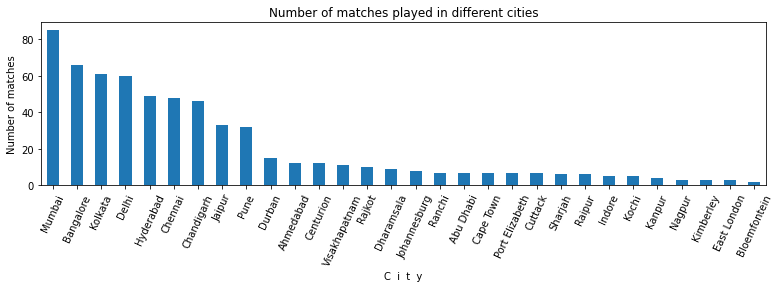

In [14]:
fig, ax = plt.subplots(figsize=(13,3))
df['city'].value_counts().plot(ax=ax, kind='bar')
plt.title('Number of matches played in different cities')
plt.xlabel('C  i  t  y')
plt.ylabel('Number of matches')
plt.xticks(rotation=65)
plt.show()

### Plot a chart that shows Number of Matches won by each team. Upload your completed Jupyter Notebook (.ipyb)

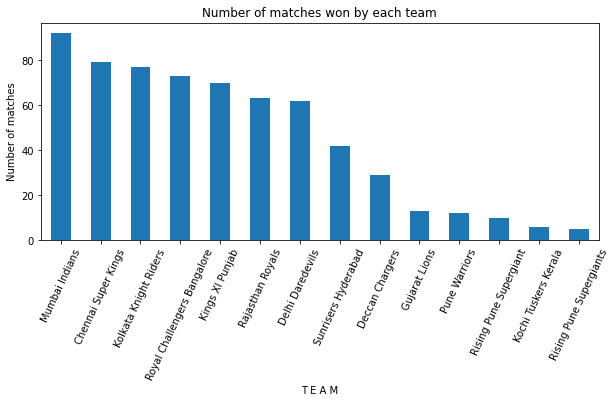

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
df['winner'].value_counts().plot(ax=ax, kind='bar')
plt.title('Number of matches won by each team')
plt.xlabel('T E A M')
plt.ylabel('Number of matches')
plt.xticks(rotation=65)
plt.show()

### Plot a chart that shows top 10 batsmen with highest number of runs. Upload your completed Jupyter Notebook (.ipyb)

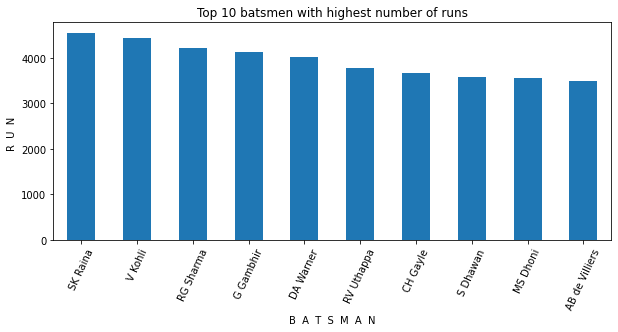

(batsman
 SK Raina          4548
 V Kohli           4423
 RG Sharma         4207
 G Gambhir         4132
 DA Warner         4014
 RV Uthappa        3778
 CH Gayle          3651
 S Dhawan          3561
 MS Dhoni          3560
 AB de Villiers    3486
 Name: batsman_runs, dtype: int64,
 None)

In [41]:
df_batsman_runs=df2['batsman_runs'].groupby(df2['batsman'])
d=df_batsman_runs.agg(np.sum)
# a=sorted(d.index, reverse=True)[:10]
# b=sorted(d, reverse=True)[:10]
topTen_batsman=d.nlargest(10)
fig, ax = plt.subplots(figsize=(10,4))
topTen_batsman.plot(ax=ax, kind='bar')
plt.title('Top 10 batsmen with highest number of runs')
plt.xlabel('B  A  T  S  M  A  N')
plt.ylabel('R  U  N ')
plt.xticks(rotation=65)
topTen_batsman, plt.show()

### Using the IPL dataset create a visualization to see if Winning the toss of a match is actually an advantage?

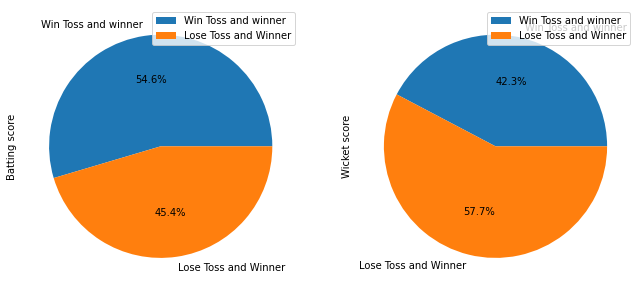

In [151]:
a=df['toss_winner']==df['winner']

df_tossAndWinner = df[(df['toss_winner']==df['winner'])]
df_tosswinField = df_tossAndWinner[(df_tossAndWinner['toss_decision']=='field')]
df_tosswinBat = df_tossAndWinner[(df_tossAndWinner['toss_decision']=='bat')] # toss win and choose bat and win
df_tosswinBat

df_notTossButWinner = df[(df['toss_winner']!=df['winner'])]
df_notTossWinField = df_notTossButWinner[(df_notTossButWinner['toss_decision']=='bat')]
df_notTossWinBat = df_notTossButWinner[(df_notTossButWinner['toss_decision']=='field')] #toss lose and choose bat and win

p=df_tosswinBat['win_by_runs']
q=df_notTossWinBat['win_by_runs']

r=df_tosswinField['win_by_wickets']
s=df_notTossWinField['win_by_wickets']

t1=(p.mean()/p.count())*100
t2=(q.mean()/q.count())*100
t3=(r.mean()/r.count())*100
t4=(s.mean()/s.count())*100

toss_win_bat = pd.DataFrame({'Batting score': [t1, t2],
                   'Wicket score': [t3, t4]},
                  index=['Win Toss and winner', 'Lose Toss and Winner'])
c=p.mean()/p.count()
plot = toss_win_bat.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))

# fig, x = plt.subplots(figsize=(10,4))
# toss_win_bat.plot(ax=x, kind='bar')
